In [3]:
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
import os
import time
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
totalmape_pm25=0
totalmape_no2=0
totalmse_pm25=0
totalmse_no2=0
totalmae_pm25=0
totalmae_no2=0
no_predictions = 24
lag_order = 24
lag_avg=0
#ids = [28079024, 28079038, 28079008, 28079040, 28079036, 28079018, 28079011, 28079004, 28079016, 28079039, 28079027]
ids = [28079024, 28079038, 28079008, 28079047, 28079050, 28079048, 28079099, 28079026, 28079006, 28079022, 28079001, 28079015]

for id in ids:
    start_exec = time.time()
    print("Processing station:",id)
    dffinal=pd.read_csv("processed-"+str(id)+".csv", index_col='date',parse_dates=True)
    #dffinal=pd.read_csv("cleaned.csv", index_col='date',parse_dates=True)

    dffinal=dffinal.drop(columns=['NO','CH4','BEN','CO','EBE','MXY','NMHC','O_3','NOx','OXY','PM10','PXY','SO_2','TCH','TOL','station'])
    dffinal.dropna()
    dffinal.drop(dffinal.index[365*12:],inplace=True)

    sc_in = MinMaxScaler(feature_range=(0, 1))
    scaled_input = sc_in.fit_transform(dffinal[['PM25','NO_2']])
    X = pd.DataFrame(scaled_input)

    X.rename(columns={0:'PM25',1:"NO_2"}, inplace=True)
    #X=np.log(np.log(X))

    #split data
    train_size=int(len(X) *0.7)
    test_size = int(len(X)) - train_size
    train_X = X[:train_size].dropna()
    test_X = X[train_size:].dropna()
    train_size = len(train_X);
    test_size = len(test_X)
    print("Total data size:",len(X))
    print("Train data size:",train_size)
    print("Test data size:",test_size)
    
    patience = 10

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    


    lag_avg = lag_avg + lag_order
   
    pred = model.predict(test_X)
    predictions = np.array(pred)
    print(predictions)

    plt.plot(pred);
    plt.plot(plot_data)
    plt.legend(["NO_2 pred","NO_2 real"])
    plt.show()

    tape_no2 = 0
    tape_pm25 = 0
    tmse_no2 = 0
    tmse_pm25 = 0
    tmae_no2 = 0
    tmae_pm25 = 0
    for i in range(train_size, train_size+no_predictions-1):
        #ape_pm25 = abs(pred.loc[i].PM25-test_X.loc[i].PM25)/abs(test_X.loc[i].PM25)*100
        ape_no2 = abs(pred.loc[i].NO_2-test_X.loc[i].NO_2)/abs(test_X.loc[i].NO_2)*100
        #mse_pm25 = (pred.loc[i].PM25-test_X.loc[i].PM25)**2
        mse_no2 = (pred.loc[i].NO_2-test_X.loc[i].NO_2)**2
        #mae_pm25 = abs(pred.loc[i].PM25-test_X.loc[i].PM25)
        mae_no2 = abs(pred.loc[i].NO_2-test_X.loc[i].NO_2)
        #tape_pm25 = tape_pm25 + ape_pm25
        tape_no2 = tape_no2 + ape_no2
        #tmse_pm25 = tmse_pm25 + mse_pm25
        tmse_no2 = tmse_no2 + mse_no2
        #tmae_pm25 = tmae_pm25 + mae_pm25
        tmae_no2 = tmae_no2 + mae_no2
    #mape_pm25 = tape_pm25/no_predictions;
    #mse_pm25 = tmse_pm25/no_predictions;
    #mae_pm25 = tmae_pm25/no_predictions;
    mape_no2 = tape_no2/no_predictions;
    mse_no2 = tmse_no2/no_predictions;
    mae_no2 = tmae_no2/no_predictions;
    #print("MAPE PM25:",mape_pm25)
    #print("MSE PM25:",mse_pm25)
    #print("MAE PM25:",mae_pm25)
    print("MAPE NO2:",mape_no2)
    print("MSE NO2:",mse_no2)
    print("MAE NO2:",mae_no2)
    print(agg_results)
    #totalmape_pm25 = totalmape_pm25 + mape_pm25
    totalmape_no2 = totalmape_no2 + mape_no2
    #totalmse_pm25 = totalmse_pm25 + mse_pm25
    totalmse_no2 = totalmse_no2 + mse_no2
    #totalmae_pm25 = totalmae_pm25 + mae_pm25
    totalmae_no2 = totalmae_no2 + mae_no2
    print("End Processing station:"+str(id)+"\n\n")
    end_exec = time.time()
    duration = end_exec-start_exec
    print("Execution time %s seconds" % duration);
    station_results=pd.DataFrame([[mape_no2,mse_no2,mae_no2,duration]], columns=['MAPE_NO2','MSE_NO2','MAE_NO2','duration'], index=[id])
    agg_results = pd.concat([agg_results,station_results])

#overallmape_pm25 = totalmape_pm25/len(ids)
overallmape_no2 = totalmape_no2/len(ids)
#overallmse_pm25 = totalmse_pm25/len(ids)
overallmse_no2 = totalmse_no2/len(ids)
#overallmae_pm25 = totalmae_pm25/len(ids)
overallmae_no2 = totalmae_no2/len(ids)
overalllag = lag_avg/len(ids);

#print("Overall MAPE PM25:",overallmape_pm25)
print("Overall MAPE NO2:",overallmape_no2)
#print("Overall MSE PM25:",overallmse_pm25)
print("Overall MSE NO2:",overallmse_no2)
#print("Overall MAE PM25:",overallmae_pm25)
print("Overall MAE NO2:",overallmae_no2)
print("Overall lag:",overalllag)

print(agg_results)

#print("Overall accuracy:",100.0-overallmape)


NameError: name 'time' is not defined

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),45669.0,999.720801,9.326337,926.91,994.55,1000.22,1005.69,1037.45
T (degC),45669.0,10.145534,8.304410,-22.33,4.09,9.47,15.88,37.28
rh (%),45669.0,67.116379,287.321210,-9999.00,62.01,78.20,93.10,100.00
sh (g/kg),45669.0,-2.057529,284.679693,-9999.00,3.98,5.52,7.83,15.87
Tpot (K),45669.0,283.332123,8.399611,256.32,277.29,282.76,289.15,310.77
Tdew (degC),45669.0,-2.842567,284.717655,-9999.00,0.59,5.18,10.28,21.14
VPmax (mbar),45669.0,14.209098,8.339801,1.01,8.19,11.86,18.07,63.77
VPact (mbar),45669.0,1.566466,284.801358,-9999.00,6.38,8.84,12.53,25.12
VPdef (mbar),45669.0,-3.566878,284.690688,-9999.00,0.65,2.22,5.60,54.11
H2OC (mmol/mol),45669.0,1.572994,284.801691,-9999.00,6.38,8.84,12.53,25.27


In [4]:
#cleanup
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

rh = df['rh (%)']
bad_rh = rh == -9999.0
rh[bad_rh] = 0

col = df['sh (g/kg)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['Tdew (degC)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['VPact (mbar)']
bad_col = col == -9999.0
col[bad_col] = 11.86

col = df['Tdew (degC)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['VPdef (mbar)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['H2OC (mmol/mol)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['rho (g/m**3)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['TRAD (degC)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['Rn (W/m**2)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['SWDR (W/m**2)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['ST004 (degC)']
bad_col = col == -9999.0
col[bad_col] = 0.0




In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),45669.0,999.720801,9.326337,926.91,994.55,1000.22,1005.69,1037.45
T (degC),45669.0,10.145534,8.304410,-22.33,4.09,9.47,15.88,37.28
rh (%),45669.0,75.217344,19.926936,0.00,62.01,78.20,93.10,100.00
sh (g/kg),45669.0,6.043436,2.628328,0.00,3.98,5.52,7.83,15.87
Tpot (K),45669.0,283.332123,8.399611,256.32,277.29,282.76,289.15,310.77
Tdew (degC),45669.0,5.258399,6.422083,-24.00,0.59,5.18,10.28,21.14
VPmax (mbar),45669.0,14.209098,8.339801,1.01,8.19,11.86,18.07,63.77
VPact (mbar),45669.0,9.677040,4.171909,0.87,6.38,8.85,12.53,25.12
VPdef (mbar),45669.0,4.534088,6.133751,0.00,0.65,2.22,5.60,54.11
H2OC (mmol/mol),45669.0,9.673960,4.190543,0.00,6.38,8.84,12.53,25.27


Text(0, 0.5, 'Wind Velocity [m/s]')

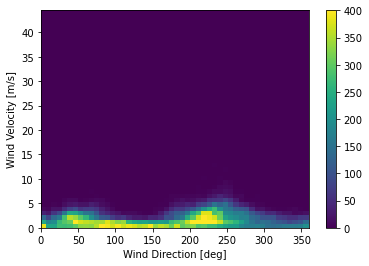

In [6]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

Text(0, 0.5, 'Wind Velocity [m/s]')

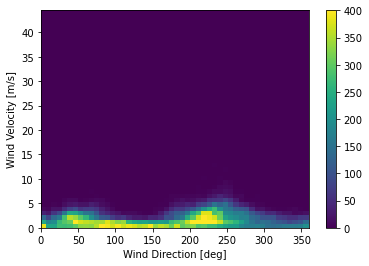

In [7]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [8]:
#timestamp convert to something usefull
timestamp_s = date_time.map(datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [9]:
#split data 70% train 20% validation 10% test
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [10]:
#normalize data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

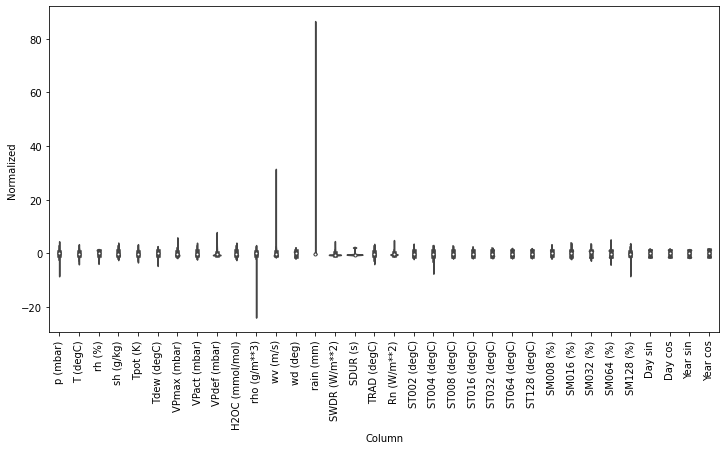

In [11]:
#plot features to see any other issues with data
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [12]:
#Window Generator
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [13]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [14]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot



All shapes are: (batch, time, features)
Window shape: (3, 7, 34)
Inputs shape: (3, 6, 34)
labels shape: (3, 1, 1)


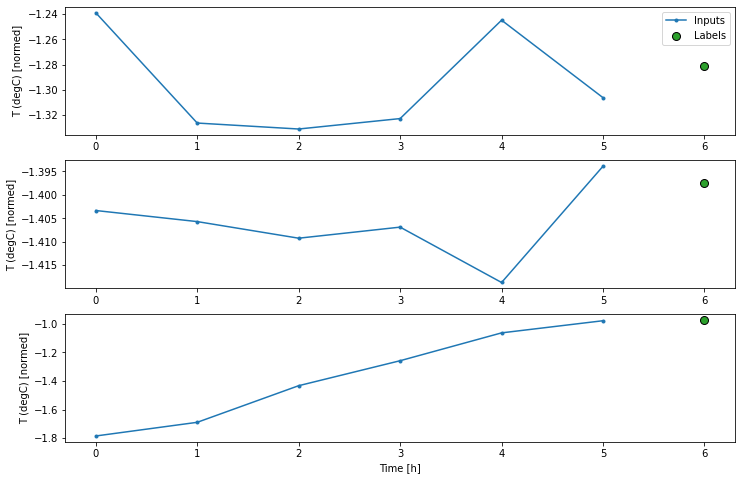

In [15]:
#Test window geerator is working
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)


print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')


w2.example = example_inputs, example_labels

w2.plot()



In [16]:
#create dataset function
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


In [17]:
#create all datasets
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [18]:
#baseline model
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [19]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])

baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

286/286 [==============================] - 1s 3ms/step - loss: 0.0296 - mean_absolute_error: 0.1187


In [20]:
wide_window = WindowGenerator(
    input_width=32, label_width=32, shift=24,
    label_columns=['T (degC)'])

wide_window

Total window size: 56
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
Label column name(s): ['T (degC)']

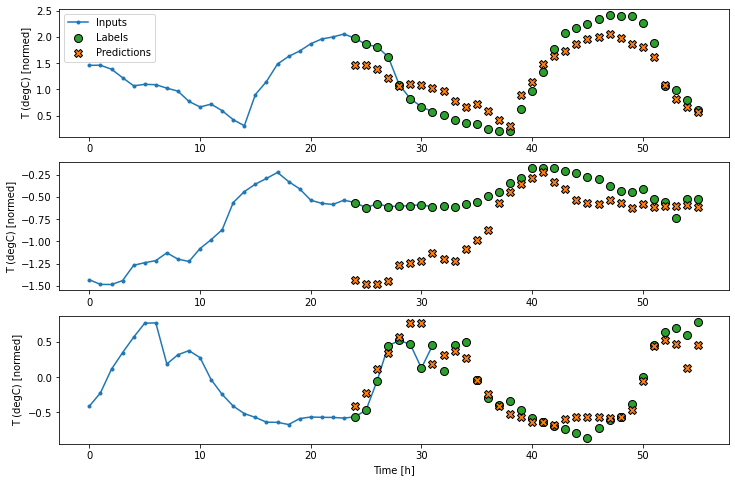

In [21]:
wide_window.plot(baseline)

In [24]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (32, 1, 34)


InternalError: Blas GEMV launch failed:  m=34, n=32 [Op:MatMul]

In [28]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [29]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20


InternalError:  Blas GEMV launch failed:  m=34, n=32
	 [[node sequential_1/dense_1/Tensordot/MatMul (defined at <ipython-input-28-716049f06cb3>:12) ]] [Op:__inference_train_function_2518]

Function call stack:
train_function


In [ ]:


show_raw_visualization(df)
#show heatmap of all features in csv files
show_heatmap(df)
#show heatmap of only non redundant features selected
show_heatmap(df[[features[i] for i in non_redundant_features]])

print(
    "The non selected features are:",
    ", ".join([feature_names[i] for i in non_redundant_features])
)
#split data we have for training and validation
split_fraction = 0.70
train_split = int(split_fraction * int(df.shape[0]))
step = 6

days_before=2
hours_after=24
number_of_features = len(non_redundant_features)

past = days_before*24*6 #5 days in the past 24h * 6readings/h * 5days
future = hours_after*6 # 24 hours prediction 6 readings/h
learning_rate = 0.001 #stop constant
batch_size = 72
epochs = 10

#filter features
selected_features = [features[i] for i in non_redundant_features]
features_selected = df[selected_features]
features_selected.index = df[date_time_key]
print(features_selected.head())
print(features_selected.shape)

#normalize features
features_selected = normalize(features_selected.values, train_split)
features_selected = pd.DataFrame(features_selected)
print(features_selected.head())
print(features_selected.shape)

features_selected[0].plot();
plt.show();

#data split with train and validation
train_data = features_selected.loc[0 : train_split - 1]
validation_data = features_selected.loc[train_split:]

startIdx = past + future
endIdx = startIdx + train_split

#train dataset creation
train_x = train_data[[i for i in range(len(non_redundant_features))]].values
train_y = features_selected.iloc[startIdx:endIdx][[0]]

sequence_length = int(past / step)
#create special train dataset with params based on how step (average on step values - 6 values 1h)
train_dataset = keras.preprocessing.timeseries_dataset_from_array(
    train_x,
    train_y,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

x_end = len(validation_data) - past - future

label_start = train_split + past + future

#validation dataset
x_val = validation_data.iloc[:x_end][[i for i in range(len(non_redundant_features))]].values
y_val = features_selected.iloc[label_start:][[0]]# 0 - means temperature in C
print(numpy.shape(x_val))
print(numpy.shape(y_val))

validation_dataset = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in train_dataset.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

#create LSTM model inputs, outputs
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(number_of_features)(inputs) # we use a specific number of features
outputs = keras.layers.Dense(1)(lstm_out) # we forecast only temp in

#create model
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse", metrics = ['accuracy','mape'])
model.summary()

#checkpoint and callback to save after each epoch
path_checkpoint = f"model_checkpoint.ds{days_before}-{hours_after}h-{number_of_features}f"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

#train the model
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=[es_callback, modelckpt_callback],
)


#visualize loss to check for overfitting, underfitting etc
visualize_loss(history, "Training and Validation Loss")

#plot 5 predictions from validation
for x, y in validation_dataset.take(5):
    show_prediction_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        f"Forecast",
    )